In [40]:
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from talib import RSI, BBANDS, MACD

sns.set_style('whitegrid')
idx = pd.IndexSlice

In [54]:
# DATA_STORE = 'data/assets.h5'
# start_year = '2013'
# end_year = '2018'
#
# with pd.HDFStore(DATA_STORE) as store:
#     data = (store['quandl/wiki/prices'].loc[idx[start_year:end_year, 'AAPL'], ['adj_open', 'adj_high', 'adj_low', 'adj_close', 'adj_volume']].unstack().swaplevel(axis=1).loc[
#             :, 'AAPL'].rename(columns=lambda x: x.replace('adj_', '')))
#
# data

,open,high,low,close,volume
date,,,,,
2013-01-02,71.816894,71.969911,70.236149,71.195748,140129500.0
2013-01-03,71.046621,71.278740,70.154453,70.296565,88241300.0
2013-01-04,69.631213,69.847109,68.187094,68.338996,148583400.0
2013-01-07,67.690619,68.637250,66.808825,67.937002,121039100.0
2013-01-08,68.625579,68.973109,67.593362,68.119845,114676800.0
...,...,...,...,...,...
2018-03-21,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.390000,169.920000,164.940000,164.940000,40248954.0


,open,high,low,close,volume
date,,,,,
2013-01-02,71.816894,71.969911,70.236149,71.195748,140129500.0
2013-01-03,71.046621,71.278740,70.154453,70.296565,88241300.0
2013-01-04,69.631213,69.847109,68.187094,68.338996,148583400.0
2013-01-07,67.690619,68.637250,66.808825,67.937002,121039100.0
2013-01-08,68.625579,68.973109,67.593362,68.119845,114676800.0
...,...,...,...,...,...
2018-03-21,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.390000,169.920000,164.940000,164.940000,40248954.0


In [120]:
import FinanceDataReader as fdr

ticker = 'TSLA'
start_date = '2019-01-01'
end_date =  '2023-03-31'

data = fdr.DataReader(ticker, start_date, end_date)[['Adj Close']].rename(columns={'Adj Close': 'close'})

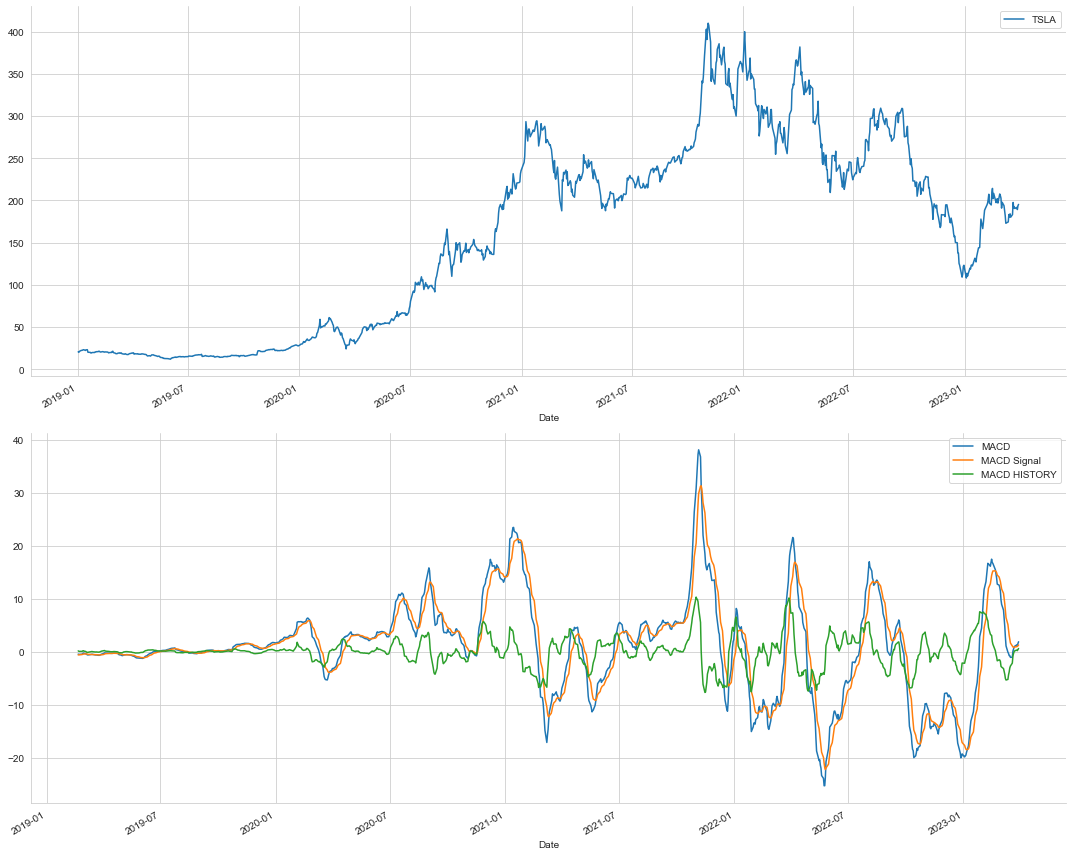

In [121]:
up, mid, low = BBANDS(data.close, timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

rsi = RSI(data.close, timeperiod=14)

macd, macdsignal, macdhist = MACD(data.close, fastperiod=12, slowperiod=26, signalperiod=9)
macd_data = pd.DataFrame({ticker: data.close, 'MACD': macd, 'MACD Signal': macdsignal, 'MACD HISTORY': macdhist})

fig, axes = plt.subplots(nrows=2, figsize=(15, 12))
macd_data[[ticker]].plot(ax=axes[0])
macd_data.drop(ticker, axis=1).plot(ax=axes[1])
fig.tight_layout()
sns.despine()

In [122]:
data = pd.DataFrame({ticker: data.close, 'BB Up': up, 'BB Mid': mid, 'BB down': low, 'RSI': rsi, 'MACD': macd})

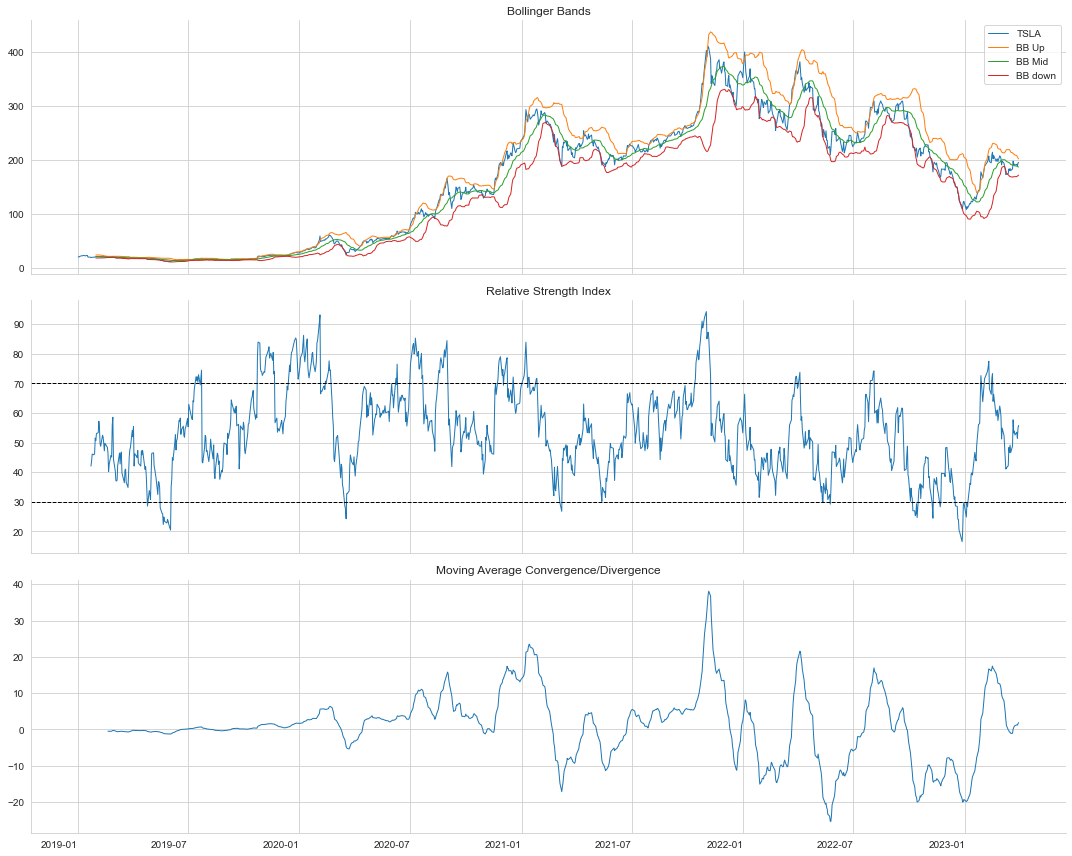

In [123]:
fig, axes= plt.subplots(nrows=3, figsize=(15, 12), sharex=True)
data.drop(['RSI', 'MACD'], axis=1).plot(ax=axes[0], lw=1, title='Bollinger Bands')
data['RSI'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')
data.MACD.plot(ax=axes[2], lw=1, title='Moving Average Convergence/Divergence', rot=0)
axes[2].set_xlabel('')
fig.tight_layout()
sns.despine();